In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, widgets, FloatSlider, IntSlider, Checkbox, Layout, Output, VBox, HBox
# import networkx as nx
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from ipykernel.pylab.backend_inline import flush_figures
%matplotlib widget

plt.rcParams['figure.figsize'] = [8.0, 8.0]


# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

<div style="padding-bottom: 40%"></div>

Welcome to APMA E2000

<img src="../img/taco.gif" width="50%" style="float:right" />

# Multivariable Calculus for Engineers and Applied Scientists

Drew Youngren
<code>dcy2@columbia.edu</code>

<p style="padding-bottom:40%;"> </p>

  # What is calculus?
  
  In the first two semesters of calculus, the object of study are functions from the real numbers to the real numbers.
  
  $$f: \RR \to \RR$$

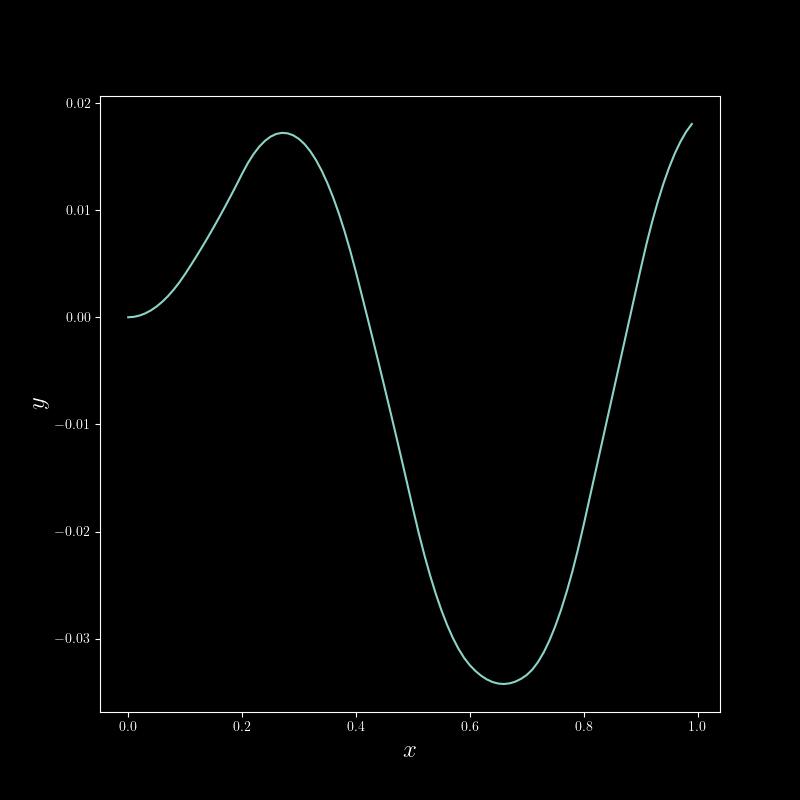

In [2]:
plt.close("A function")
fig = plt.figure("A function",figsize=(8,8))
dt = 1/100
xs = np.arange(0,1,dt)
ys = np.zeros(100)
vel = 0
acc = np.random.random()*4 - 2
for i in range(1,len(ys)):
    ys[i] = ys[i-1] + vel * dt + acc * dt**2/2
    
    vel += acc * dt
    if i % 10 == 0:
        acc = np.random.random()*4 - 2

plt.xlabel("$x$",fontsize=18)
plt.ylabel("$y$",fontsize=18)

plt.plot(xs,ys);
# plt.rcParams['figure.figsize'] = (8,8)

<div style="padding-bottom: 40%"></div>

# What is multivariable calculus?

In multivariable calculus, we'll expand this study in three ways:

  - Vector-valued functions (curves) $$f:\RR \to \RR^n$$

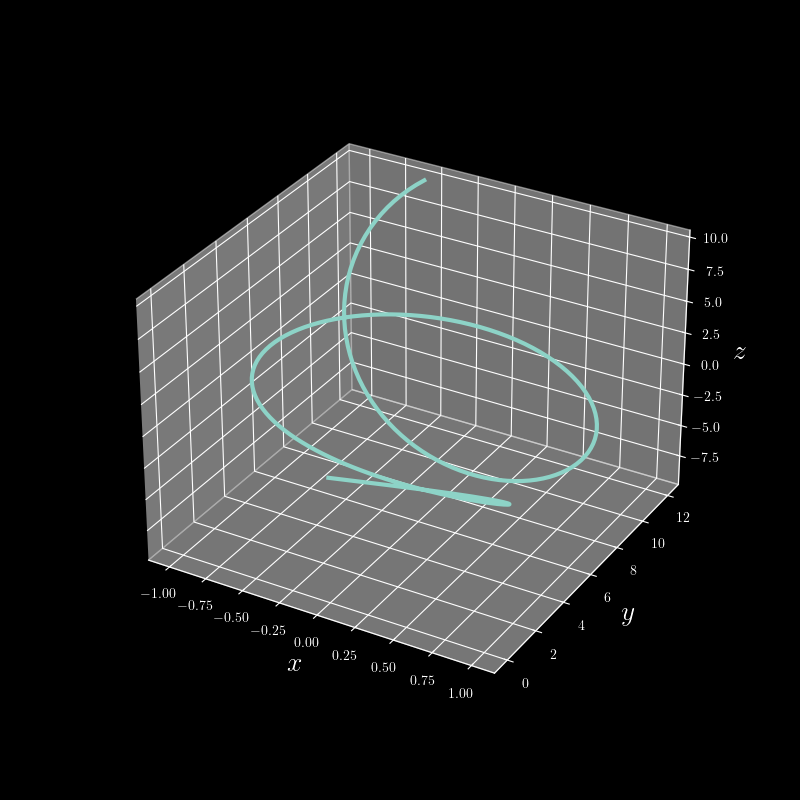

In [12]:
TITLE = "A curve"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)

fig = plt.figure(TITLE, figsize=(8,8))
ax = plt.subplot(projection='3d')

t = np.linspace(0,12,200)
ax.plot(np.sin(t),t,t*np.cos(t), lw=3);
for c in "xyz":
    getattr(ax, f"set_{c}label")(f"${c}$", fontsize=20)


  - Functions of several variables (scalar fields) $$f:\RR^n \to \RR$$

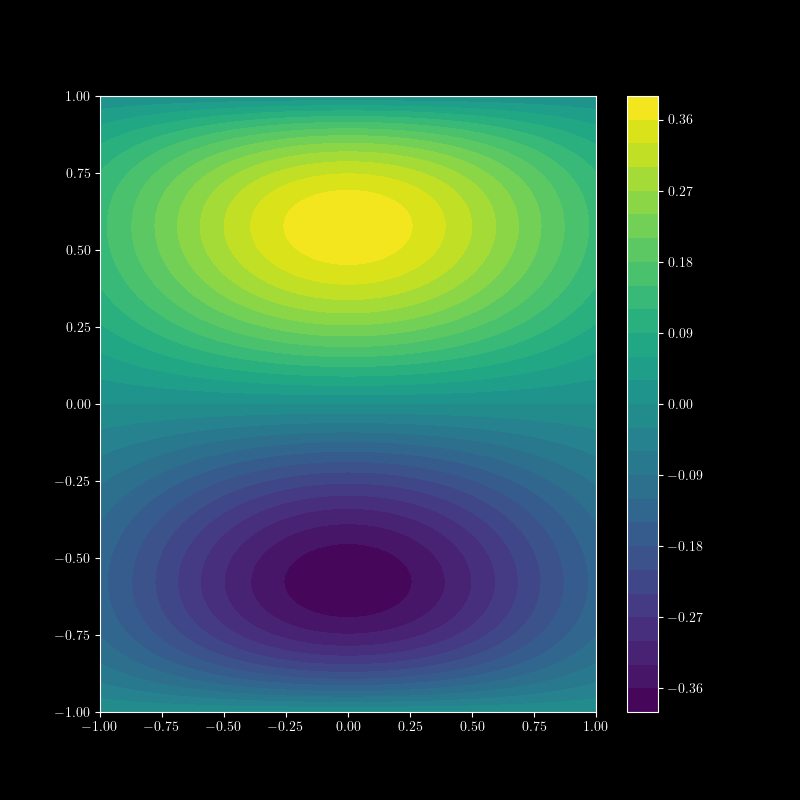

In [4]:
plt.close("A scalar field")
fig = plt.figure("A scalar field")
x = y = np.linspace(-1,1,200)
x, y = np.meshgrid(x,y)
plt.contourf(x,y,(y - y**3)*np.exp(-x**2), levels=25)
plt.colorbar();

  <div style="padding-bottom: 40%"></div>

  - Vector fields $$f:\RR^n \to \RR^n$$

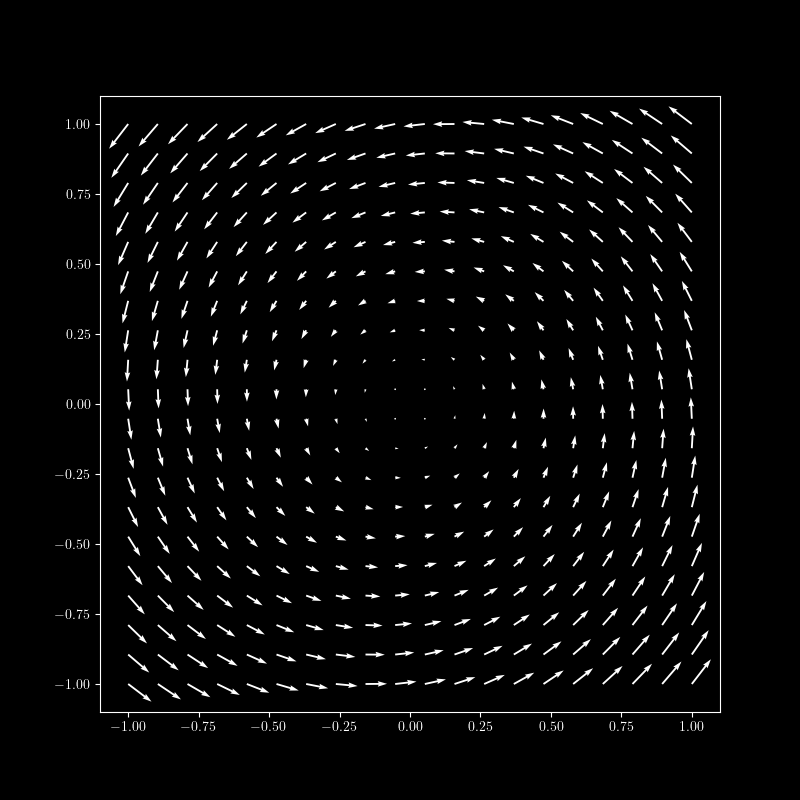

In [8]:
TITLE = "A vector field"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(8,8))
ax = fig.add_subplot()

x = y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)

ax.quiver(x, y, -y - x/10, x - y/6,color='w');

<p style="padding-bottom:40%;"> </p>

<h2>What is $\RR^n$?</h2> 

$$ \RR = \RR^1 = \text{ the real numbers}$$

$$\RR^2 = \{ (x,y): x,y \in \RR \} = \text{ the Cartesian plane}$$

$$\RR^3 = \{ (x,y,z): x,y,z \in \RR \} = \text{ 3-space}$$

$$\dots$$ $$ \RR^n = n\text{-space}$$

<div style="padding-bottom: 40%"></div>

## Loci

A set of points in space determined by some condition is called a **locus**. These are often solution sets to equations. Many examples involve the distance formula.

### Examples

  1. $z = 0$
  1. $x = 0$
  1. $y = 0$
  1. $x + y = 0$

interactive(children=(Dropdown(description='example', options={1: {'str': '$xy$-plane', 'basis': ((1, 0, 0), (…

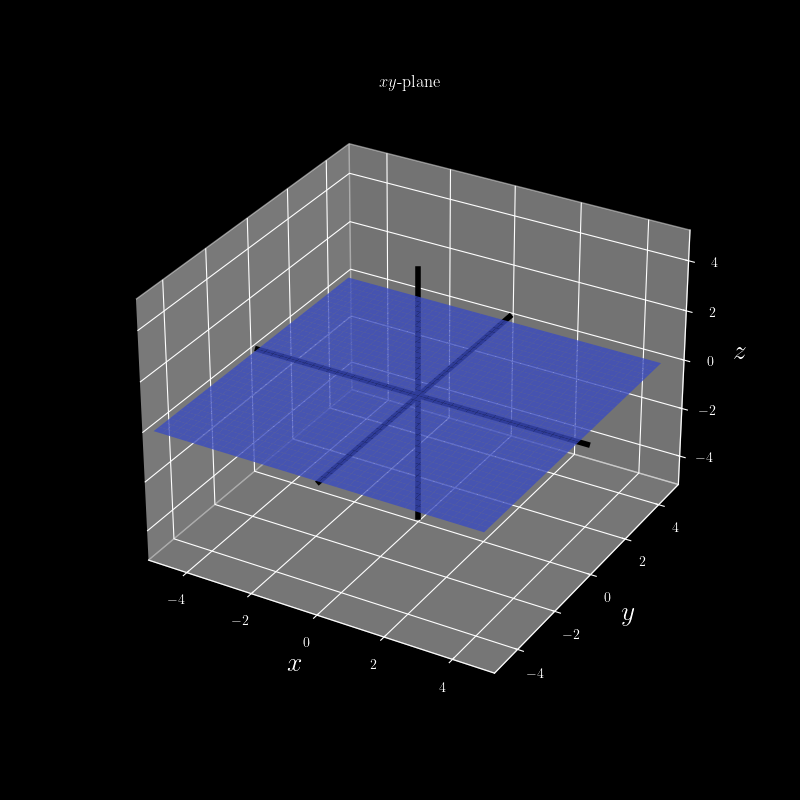

In [23]:
TITLE = "Loci Examples"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)

fig = plt.figure(TITLE, figsize=(8,8))
ax = plt.subplot(projection='3d')
fig.canvas.header_visible = False

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
#     Z = -3*X

for c in "xyz":
    getattr(ax,f"set_{c}label")(f"${c}$", fontsize=20)
    getattr(ax,f"set_{c}lim")(-5,5)


ax.plot([-5,5],[0,0],[0,0],'k',lw=4)
ax.plot([0,0],[-5,5],[0,0],'k',lw=4)
ax.plot([0,0],[0,0],[-5,5],'k',lw=4)    

surf =    ax.plot_surface(X, Y, 0*X, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,alpha=.8);

@interact
def _(example={1 : {"str": "$xy$-plane", "basis" : ((1,0,0),(0,1,0))}, 
               2 : {"str": "$yz$-plane", "basis" : ((0,1,0),(0,0,1))}, 
               3 : {"str": "$xz$-plane", "basis" : ((1,0,0),(0,0,1))}, 
               4 : {"str": "$x + y = 0$", "basis" : ((1,-1,0),(0,0,1))}   }):
    ax.set_title(example["str"])

    # Plot the surface.
    u,v = example["basis"];
    
    ax.collections.pop()
    ax.plot_surface(X * u[0] + Y*v[0] , X * u[1] + Y*v[1] , X * u[2] + Y*v[2] , cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,alpha=.8);
    # flush_figures()

<div style="padding-bottom: 40%"></div>

## Exercise

We will regularly use Poll Everywhere for in-class surveys/exercises/check-ins. 
The link will always be at [https://pollev.com/dcy2](https://pollev.com/dcy2).

In [ ]:
display(HTML("""<iframe src="https://pollev-embeds.com/multiple_choice_polls/67seK1hGZmUVXD9OxNmDL/respond" width="800px" height="600px"></iframe>"""));

<div style="padding-bottom: 40%"></div>

## Distance

The formula for the distance between two points $(p_1,...,p_n)$ and $(q_1,...,q_n)$ in $\RR^n$ is trivial if you just remember the Pythagorean Theorem.

$$d = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$$

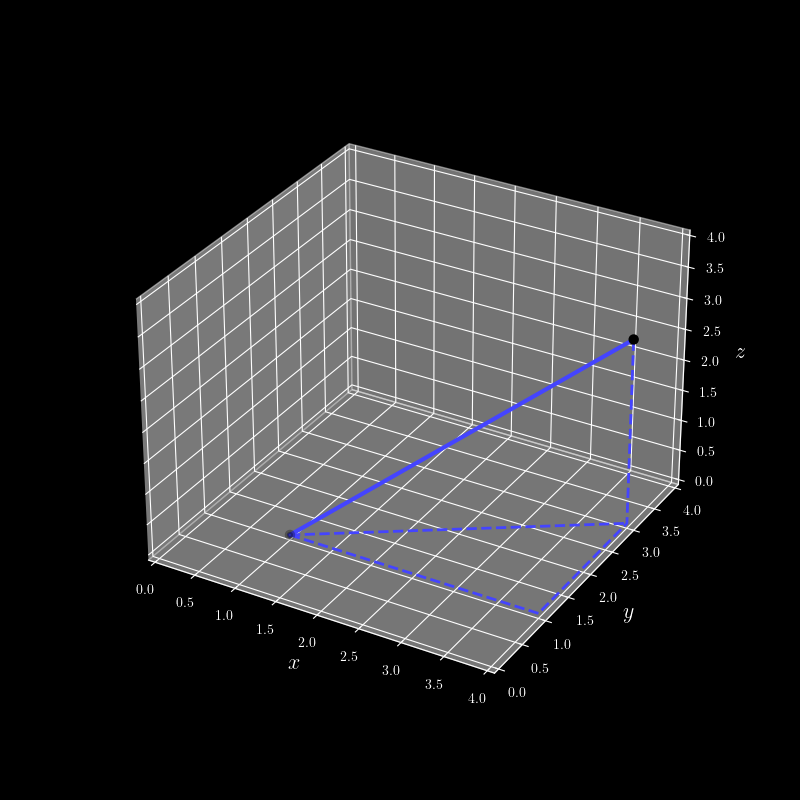

In [28]:
TITLE = "Pythagorus"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.plot([1,4],[1,3],[0,3],lw=3,color='#4444ff')
ax.plot([1,4],[1,3],[0,0],lw=2,ls='--',color='#4444ff')
ax.plot([1,4,4,4],[1,1,3,3],[0,0,0,3],lw=2,ls='dashed',color='#4444ff')
ax.scatter([1,4],[1,3],[0,3],lw=3,color='k')

for c in "xyz":
    getattr(ax,f"set_{c}lim")(0,4)
    getattr(ax,f"set_{c}label")(f"${c}$",fontsize=16)



  2. $x^2 + y^2 +z^2 = 1$

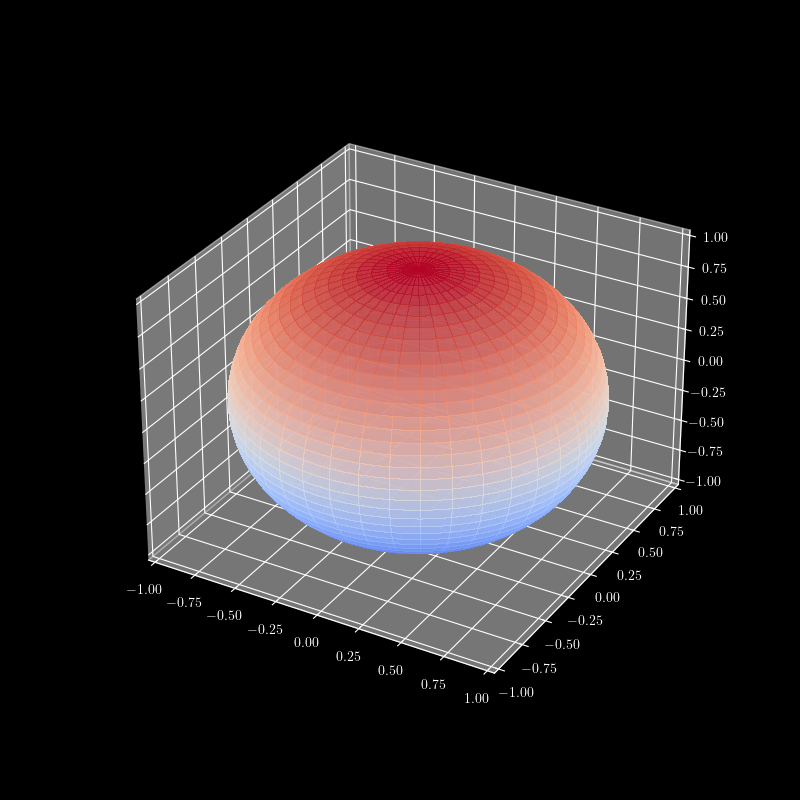

In [29]:
TITLE = "Pythagorus"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(8,8))
ax = fig.add_subplot(projection='3d')
fig.canvas.header_visible = False

# Make data.
x = np.linspace(0, 2*np.pi,80)
y = np.linspace(0, np.pi,40)
x, y = np.meshgrid(x, y)
X = np.sin(y)*np.cos(x)
Y = np.sin(y)*np.sin(x)
Z = np.cos(y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.2, antialiased=False,alpha=.8)
for dim in 'xyz':
    getattr(ax, f'set_{dim}lim')([-1,1])


<div style="padding-bottom: 40%"></div>

# Scalars and Vectors

A good first step when analyzing anything in this class, be it a problem, a theorem, a statement, an expression, is to take each component one at a time, and play the game _Is it a scalar or a vector?_

<div style="padding-bottom: 40%"></div>

<div style="padding-bottom: 40%"></div>

# Vectors

A **vector** in $\RR^n$ is a directed line segment $\overrightarrow{AB}$ between two points. 

Two vectors are considered the same if they have the same *magnitude* (length) and *direction*.

In [30]:
def plot_vector(v,ax,base=(0,0),**kwargs):
    """Plots a vector `v` with tail at the point `base` (defaults to origin) on the axes ax."""
    ax.arrow(base[0],base[1],v[0],v[1],length_includes_head=True,head_width=.2,**kwargs);

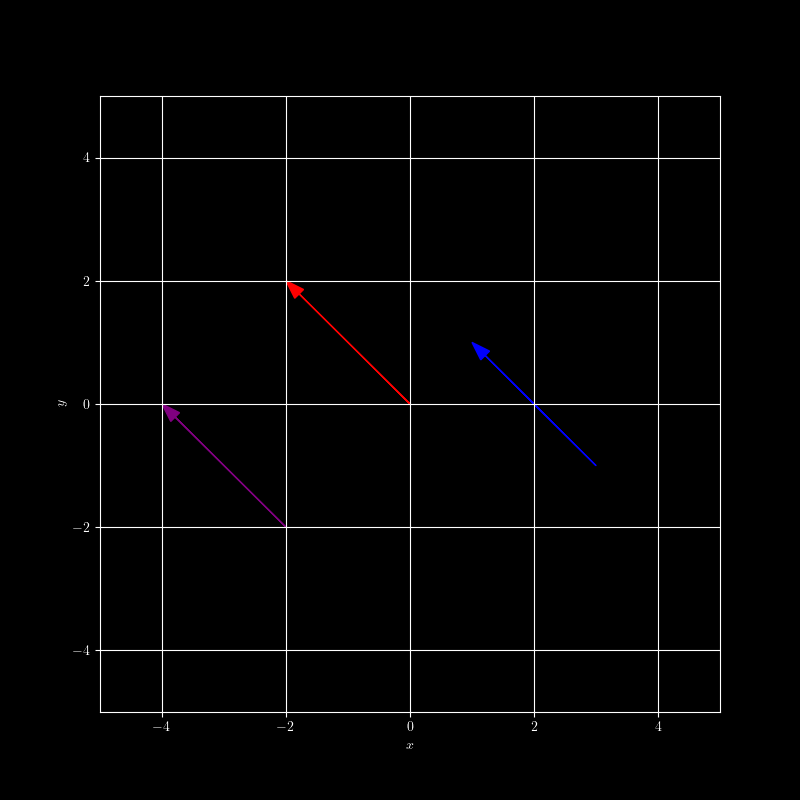

In [31]:
v = np.array([-2,2])
w = np.array([3,-4])

plt.close("A Vector")
fig = plt.figure(num="A Vector")

ax = fig.gca()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

plot_vector(v,ax,color='r')
plot_vector(v,ax,base=(3,-1),color='b')
plot_vector(v,ax,base=(-2,-2),color='purple')
ax.grid(True);


<p style="padding-bottom:40%;"> </p>

## Notation

We specify a vector by the displacement in each component. E.g., $$\vec v = \langle 3,1 \rangle = \bv{3 \\ 1}.$$

<div style="padding-bottom: 40%"></div>

### Points vs Vectors

$(3,21)$ is a point. $\vec v = \langle 3,21\rangle$ is a vector. 

"21st St & 3rd Ave" is a location. "21 blocks north and 3 blocks west" is a displacement. 

<p style="padding-bottom:40%;"> </p>

# Vector Operations

The most important aspect of vectors is what you can do with/to them. In a sense their defining feature is that they can be **scaled** and **added together**.

Let $\vec v = \langle v_1, v_2, v_3 \rangle$.

### Magnitude

The **magnitude** of a vector $\vec v$ is a (nonnegative) scalar $|\vec v|$ (also written $\| \vec v \|$). 

$$|\vec v| = \sqrt{v_1^2 +v_2^2 + v_3^2}$$

<div style="padding-bottom: 40%"></div>

## Scalar multiplication

Let $c$ be a scalar. $$c\vec v = \langle c v_1, c v_2, c v_3\rangle$$

interactive(children=(FloatSlider(value=1.0, description='c', max=2.0, min=-2.0, step=0.025), Output()), _dom_…

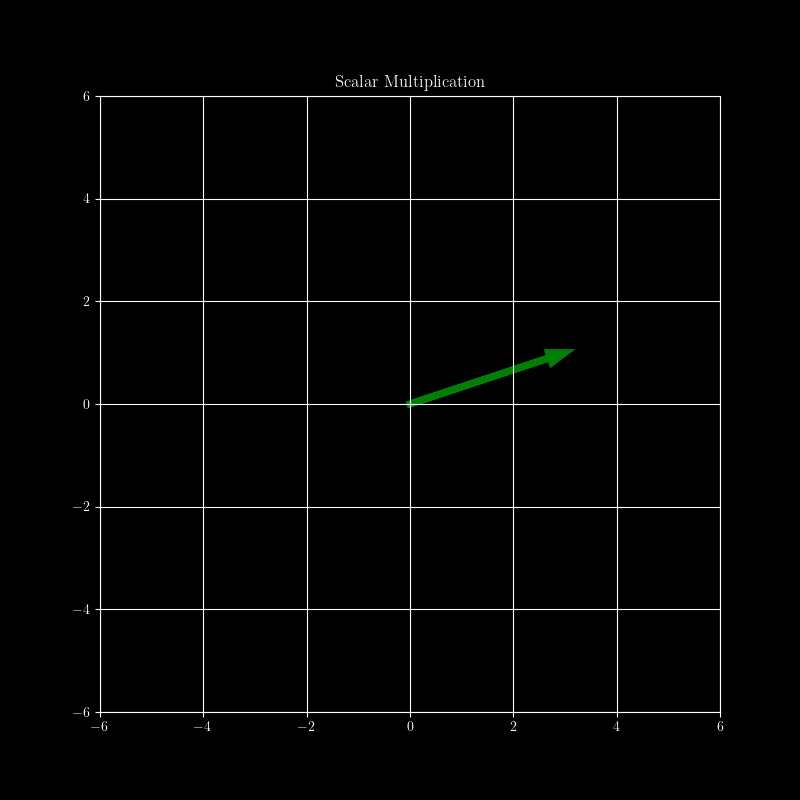

In [38]:
TITLE="Scalar Multiplication"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(8,8))
ax8 = fig.add_subplot()

arrow = ax8.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True,lw=5)
ax8.arrow(0,0,1*3,1*1,color='g',head_width=.2,length_includes_head=True,lw=5)

ax8.set_xlim([-6,6])
ax8.set_ylim([-6,6])
ax8.grid(True)
ax8.set_title(TITLE)

@interact(c=(-2,2,.025))
def _(c=1):
    ax8.patches.pop()
    ax8.arrow(0,0,c*3,c*1,color='g',head_width=.2,length_includes_head=True,lw=5)

# Short exercises

  1. Complete the identity $$|c\vec v| = $$ 
  2. Find a **unit vector** (a vector of length 1) in the direction of $\langle 3,12,-4 \rangle $.

## [Exercise](https://pollev.com/dcy2)

<p style="padding-bottom:40%;"> </p>

## Vector addition

Let $\vec w = \langle w_1,w_2,w_3 \rangle$. $$\vec v + \vec w = \langle v_1 +w_1, v_2+w_2, v_3+w_3 \rangle$$

interactive(children=(FloatSlider(value=-1.0, description='a', max=1.0, min=-3.0, step=0.05), FloatSlider(valu…

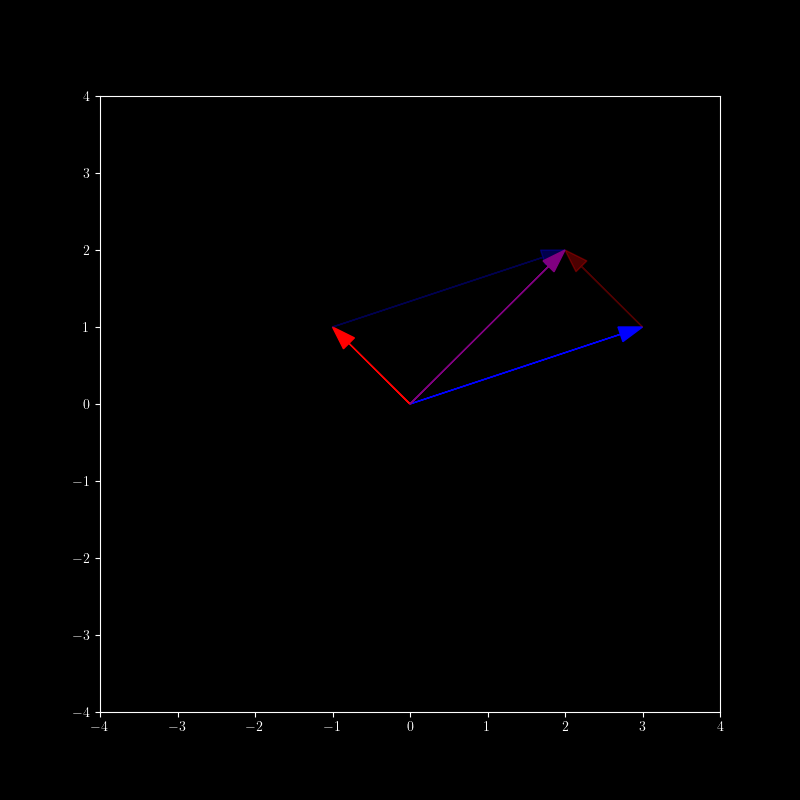

In [42]:
TITLE="Vector Addition"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(8,8))
ax9 = fig.add_subplot()
ax9.set_xlim(-4,4)
ax9.set_ylim(-4,4)
v = np.array((3,1))
ax.grid(True)

@interact
def _(a=(-3,1,.05),b=(-1,3,.05)):

    ax9.patches.clear()
    w = np.array((a,b))

    ax9.arrow(0,0,v[0],v[1],color='b',head_width=.2,length_includes_head=True)
    ax9.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
    ax9.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)
    ax9.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)
    ax9.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)


<p style="padding-bottom:40%;"> </p>

# Linear combinations

A **linear combination** of vectors $\vec v$ and $\vec w$ is a vector $$a\vec v + b \vec w$$where $a$ and $b$ are arbitrary scalars. 

interactive(children=(FloatSlider(value=-1.0, description='a', max=1.0, min=-3.0, step=0.05), FloatSlider(valu…

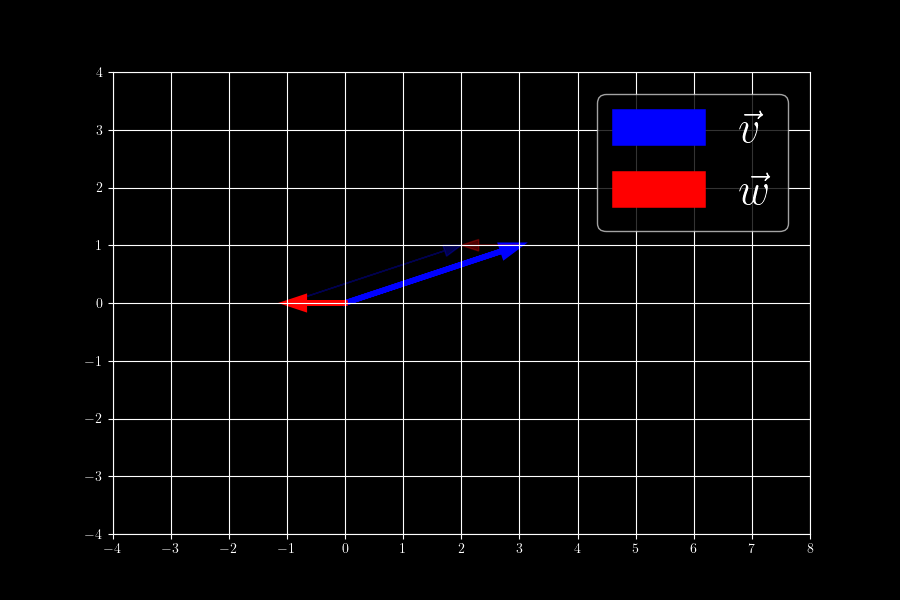

In [56]:
v = np.array([3,1])

TITLE="Linear Combinations"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(9,6))
ax10 = fig.add_subplot()
ax10.set_xlim(-4,4)
ax10.set_ylim(-4,4)
v = np.array((3,1))
ax10.grid(True)

plt.xlim([-4,8])
plt.ylim([-4,4])
plt.grid(True)
plt.xticks(np.arange(-4,9,1))


@interact
def _(a=(-3,1,.05),b=(-3,3,.05),V=True, W=True, add=False, diff=False, avg=False, wtd_avg=False):
    ax10.patches.clear()

    w = np.array([a,b])
    
    if V:
        ax10.arrow(0,0,v[0],v[1],color='b',lw=4, label=r"$\vec{v}$", head_width=.2,length_includes_head=True)
        ax10.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)


    if W:
        ax10.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True,lw=4,label=r"$\vec{w}$")
        ax10.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)

    if add:
        plot_vector(v + w,ax10,color='purple',label=r"$\vec v + \vec{w}$")
        
    if diff:
        plot_vector(v - w,ax10,color='orange',base=w,label=r"$\vec{v} - \vec{w}$")

    if avg:
        plot_vector(v/2 + w/2,ax10,color='green',label=r"$\frac{\vec v + \vec{w}}{2}$")

    if wtd_avg:
        plot_vector(v/4 + 3*w/4,ax10,color='yellow',label=r"$\frac14 \vec{v} + \frac34 \vec{w}$")
        
    ax10.legend(fontsize=32);
    # flush_figures()

<p style="padding-bottom:40%;"> </p>

#### Exercise

Where would $2\vec v - 1\vec w$ be on this plot? 

$3 \vec v - 2 \vec w$? 

interactive(children=(FloatSlider(value=-1.0, description='a', max=1.0, min=-3.0, step=0.05), FloatSlider(valu…

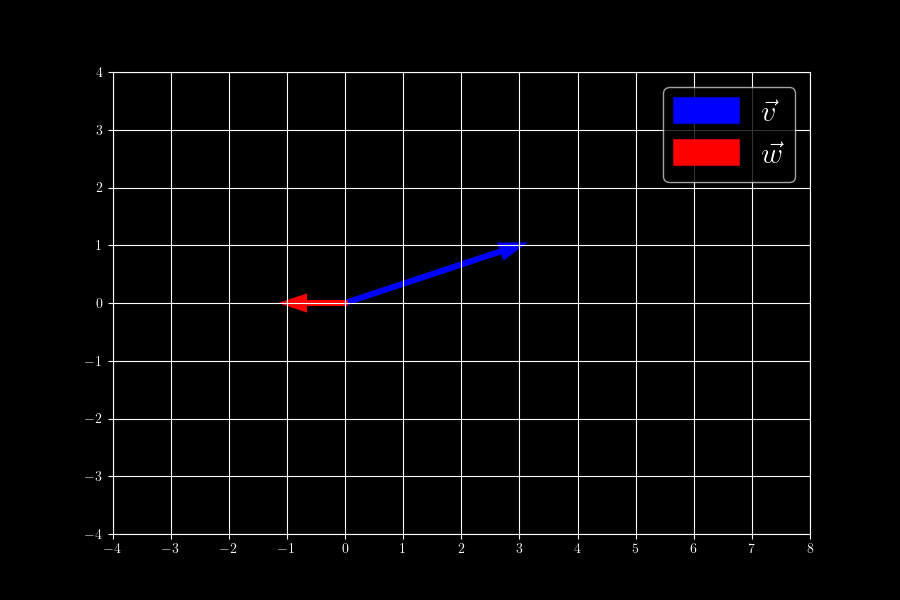

In [60]:
v = np.array([3,1])

TITLE="An exercise"
if TITLE in plt.get_figlabels():
    plt.close(TITLE)
fig = plt.figure(TITLE, figsize=(9,6))
ax11 = fig.add_subplot()
ax11.set_xlim(-4,4)
ax11.set_ylim(-4,4)
v = np.array((3,1))
ax11.grid(True)

plt.xlim([-4,8])
plt.ylim([-4,4])
plt.grid(True)
plt.xticks(np.arange(-4,9,1))


@interact
def _(a=(-3,1,.05),b=(-3,3,.05),V=True, W=True, ans1=False, ans2=False):
    ax11.patches.clear()

    w = np.array([a,b])
    
    if V:
        ax11.arrow(0,0,v[0],v[1],color='b',lw=4, label=r"$\vec{v}$", head_width=.2,length_includes_head=True)
        # ax11.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)


    if W:
        ax11.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True,lw=4,label=r"$\vec{w}$")
        # ax11.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)

    if ans1:
        plot_vector(2*v - w,ax11,color='cyan',label=r"$2\vec v - \vec{w}$")
        
    if ans2:
        plot_vector(3*v - 2*w,ax11,color='orange', label=r"$3\vec{v} - 2\vec{w}$")
        
    ax11.legend(fontsize=22);
    # flush_figures()

<p style="padding-bottom:40%;"> </p>

A **convex combination** of vectors $\vec v$ and $\vec w$ has the form $$(1-t) \vec v + t \vec w$$ for some scalar $t$.

<p style="padding-bottom:40%;"> </p>

  2. (extra) What linear combination is this? $$ .25 \vec h + .25\vec q + .3 \vec m + .2 \vec f$$
  

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<div style="padding-bottom: 40%"></div>

<div style="padding-bottom: 40%"></div>

# Addenda

A few miscellaneous points about scalars and vectors. 

  - The magnitude $|\vec v|$ pf a vector can, in various contexts, be called the _length_, _norm_, _modulus_, _amplitude_, or _size_ of a vector. 
  - A **unit vector** $\vec u$ is a vector with magnitude $|\vec u| = 1$. I've heard this called a _pure direction_.
  - Any nonzero vector $\vec v$ can be transformed into a unit vector with the same direction by scaling. To wit: $$\vec u = \frac{\vec v}{|\vec v|} $$ is a unit vector for all $\vec v \neq \vec 0$. This process is called **normalization**.
  - $\vec 0$ is a vector. 

<div style="padding-bottom: 40%"></div>

## Questions

  - How would you describe "the set of all unit vectors"?
  - If $\vec a$ represents a position in space and $r$ is a positive scalar, what is the set of $\vec x$ such that $$|\vec x - \vec a| = r?$$

<div style="padding-bottom: 40%"></div>

# Next time

Can we multiply vectors?